<a href="https://colab.research.google.com/github/Guo0911/generative_ai/blob/main/%5BGenerative_AI%5D_Homework_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 建立自己的 Benchmarks

#### 1、建立一組自己的基準測試 (Prompts)
#### 2、主題是自己有興趣並且要能分辨好壞
#### 3、至少使用兩種以上的 LLM 來測試
#### 4、對這些模型回答的看法 (Ex: 比較喜歡哪一個？為什麼？)

In [1]:
# 讓 Colab 不會輸出警告或非必要的訊息
import warnings
warnings.filterwarnings("ignore")

## 問題 (以一個 Prompt 做輸入)
請撰寫一支 Python 程式模擬擲一顆不公平的骰子的過程，需要符合以下條件：
1. 該程式會在 Colab 上執行
2. 骰子的數字範圍為 1 ~ 6 之間
3. 擲到 5 和 6 的機率分別是 15% 和 25%，其餘數字的機率相同
4. 隨機擲 1000 次並統計每次出現的數字
5. 最後需要畫一張長條圖顯示各個數字出現的次數

### ChatGPT

以下是符合條件的 Python 程式，使用 NumPy 來模擬不公平的骰子，並使用 Matplotlib 繪製長條圖：

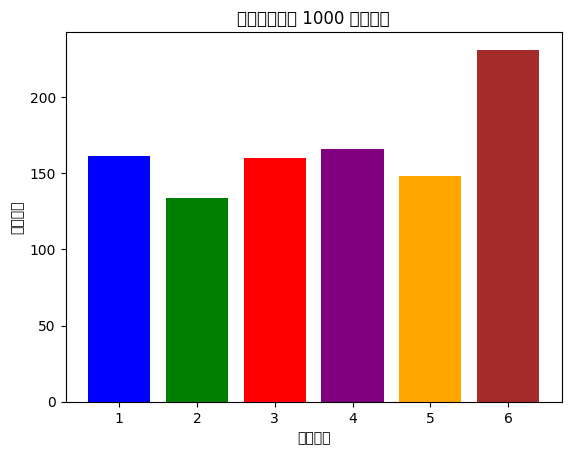

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定義骰子的面數與機率
faces = [1, 2, 3, 4, 5, 6]
probabilities = [0.15, 0.15, 0.15, 0.15, 0.15, 0.25]  # 1~4 各15%，5為15%，6為25%

# 擲骰子 1000 次
num_rolls = 1000
results = np.random.choice(faces, size=num_rolls, p=probabilities)

# 統計結果
unique, counts = np.unique(results, return_counts=True)

# 繪製長條圖
plt.bar(unique, counts, tick_label=unique, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('骰子點數')
plt.ylabel('出現次數')
plt.title('不公平骰子擲 1000 次的結果')
plt.show()

這段程式碼會在 Google Colab 上順利執行，透過 `numpy.random.choice` 依照指定的機率模擬擲骰子，並使用 Matplotlib 繪製結果長條圖。你可以直接在 Colab 執行這段程式碼來觀察結果！🎲📊

### Claude 3.7 Sonnet

我會為您撰寫一個在 Colab 上模擬擲不公平骰子的 Python 程式。這個程式會根據您指定的機率分布進行 1000 次模擬，並以長條圖呈現結果。

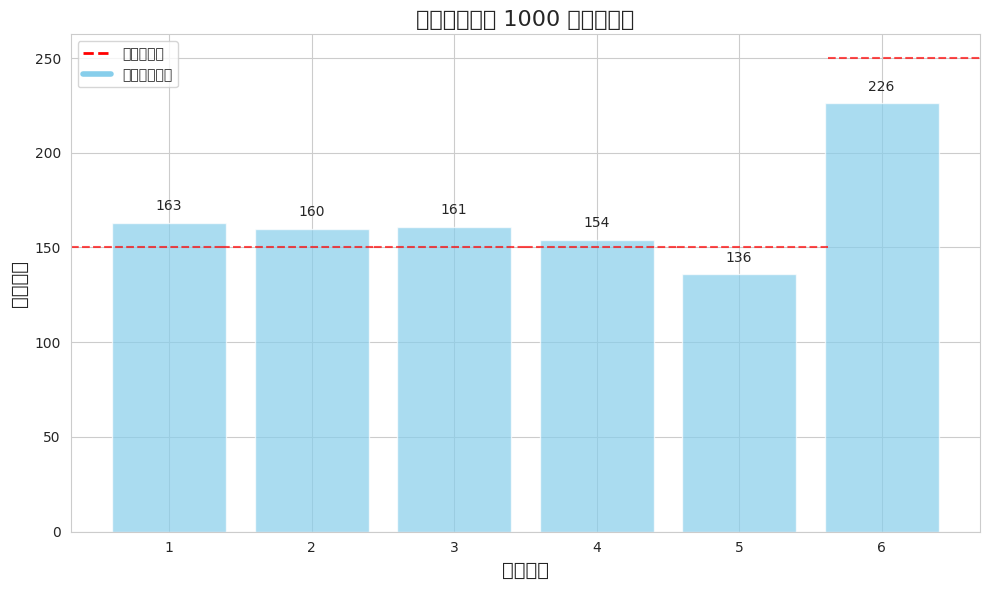

骰子點數統計結果：
點數 1: 163 次 (16.30%)
點數 2: 160 次 (16.00%)
點數 3: 161 次 (16.10%)
點數 4: 154 次 (15.40%)
點數 5: 136 次 (13.60%)
點數 6: 226 次 (22.60%)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 設定中文字型支援
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 定義不公平骰子的機率分布
# 擲到5的機率為15%，擲到6的機率為25%
# 剩餘60%的機率平均分配給1、2、3、4（每個15%）
def roll_unfair_dice(num_rolls=1):
    # 設定各數字的機率
    probabilities = [0.15, 0.15, 0.15, 0.15, 0.15, 0.25]

    # 確保機率總和為1
    assert sum(probabilities) == 1.0

    # 使用numpy的random.choice進行隨機抽樣
    # 可能的結果為1到6，對應索引0到5，所以要加1
    results = np.random.choice(np.arange(1, 7), size=num_rolls, p=probabilities)
    return results

# 進行1000次擲骰子模擬
num_simulations = 1000
dice_results = roll_unfair_dice(num_simulations)

# 統計每個數字出現的次數
counts = Counter(dice_results)
sorted_counts = {i: counts.get(i, 0) for i in range(1, 7)}

# 計算各數字的理論期望次數
expected_counts = {
    1: 0.15 * num_simulations,
    2: 0.15 * num_simulations,
    3: 0.15 * num_simulations,
    4: 0.15 * num_simulations,
    5: 0.15 * num_simulations,
    6: 0.25 * num_simulations
}

# 繪製長條圖
plt.figure(figsize=(10, 6))

# 設定風格
sns.set_style("whitegrid")

# 使用seaborn的barplot繪製結果
bar_positions = np.arange(1, 7)
bars = plt.bar(bar_positions, [sorted_counts[i] for i in range(1, 7)], alpha=0.7, color='skyblue')

# 在長條圖上標示次數
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom')

# 加上期望值的水平線
for i in range(1, 7):
    plt.axhline(y=expected_counts[i], xmin=(i-1)/6, xmax=i/6, color='red', linestyle='--', alpha=0.7)

# 加上標題和標籤
plt.title('不公平骰子的 1000 次模擬結果', fontsize=16)
plt.xlabel('骰子點數', fontsize=14)
plt.ylabel('出現次數', fontsize=14)
plt.xticks(bar_positions)

# 加上圖例
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=2, linestyle='--'),
                Line2D([0], [0], color='skyblue', lw=4)]
plt.legend(custom_lines, ['理論期望值', '實際模擬結果'])

# 調整版面
plt.tight_layout()

# 顯示圖表
plt.show()

# 輸出各點數的次數和百分比
print("骰子點數統計結果：")
for i in range(1, 7):
    percentage = sorted_counts[i] / num_simulations * 100
    print(f"點數 {i}: {sorted_counts[i]} 次 ({percentage:.2f}%)")

這個程式的功能說明：

1. 使用 `numpy.random.choice` 函數來模擬不公平骰子，設定各點數的機率為：
   - 點數 1 到 4：各 15%
   - 點數 5：15%
   - 點數 6：25%

2. 進行 1000 次骰子模擬，並統計每個點數出現的次數

3. 繪製長條圖顯示結果：
   - 藍色長條代表實際模擬結果
   - 紅色虛線代表理論期望值
   - 每個長條上方標示出現次數

4. 最後輸出每個點數的統計結果和出現百分比

這個程式在 Google Colab 上可以直接執行。如果遇到中文顯示問題，您可能需要安裝或調整字體設定，不過在 Colab 環境應該能正常運行。

### Colab 的生成程式碼功能

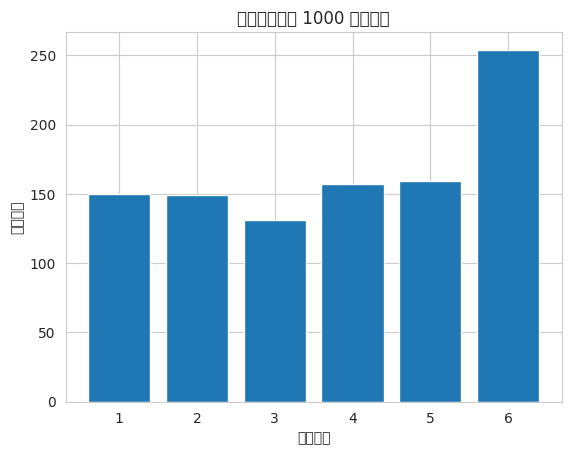

In [4]:
# prompt: 請撰寫一支 Python 程式模擬擲一顆不公平的骰子的過程，需要符合以下條件：
# 1. 該程式會在 Colab 上執行
# 2. 骰子的數字範圍為 1 ~ 6 之間
# 3. 擲到 5 和 6 的機率分別是 15% 和 25%，其餘數字的機率相同
# 4. 隨機擲 1000 次並統計每次出現的數字
# 5. 最後需要畫一張長條圖顯示各個數字出現的次數

import numpy as np
import matplotlib.pyplot as plt

# 定義骰子的面數與機率
faces = [1, 2, 3, 4, 5, 6]
probabilities = [0.15, 0.15, 0.15, 0.15, 0.15, 0.25]  # 1~4 各15%，5為15%，6為25%

# 擲骰子 1000 次
num_rolls = 1000
results = np.random.choice(faces, size=num_rolls, p=probabilities)

# 統計結果
unique, counts = np.unique(results, return_counts=True)

# 繪製長條圖
plt.bar(unique, counts, tick_label=unique)
plt.xlabel('骰子點數')
plt.ylabel('出現次數')
plt.title('不公平骰子擲 1000 次的結果')
plt.show()


### 對於不同 LLM 給予回覆的想法

首先是 ChatGPT 與 Colab 的程式幾乎相同，只有差在有沒有設定長條圖的顏色，但我是先新增 ChatGPT 的程式碼後再讓 Colab 產生程式碼，我認為出現這種情況有兩種可能：
1. 目的太過簡單，所以兩者撰寫的 Code 才會非常相近 (我認為比較有可能)
2. 讓 Colab 生成時，他會考量目前已經撰寫的程式 (但因為他沒有用到顏色設定，所以我認為比較不會是這個)

---

再來是 Claude 的程式碼明顯比其他兩個更長，但其輸出的圖表和數據也更加詳細：
1. 雖然沒有顏色的設定，但卻有劃出期望值的水平線
2. 在圖內有標示各個數字出現的次數，也有輸出次數和比例

因此雖然對簡單的題目給予的程式碼比較長，但其回應是我覺得更好的、更詳細的。